In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape


(768, 9)

In [7]:
duplicates = data.duplicated()
if duplicates.any():
    print("Duplicates found!")
    duplicate_rows = data[duplicates]
    print(duplicate_rows)
else:
    print("No duplicates found!")

No duplicates found!


In [8]:
features_variables = data.iloc[:, 0:8]
#get the outcome variables
outcome_variable = data.iloc[:, -1]

In [9]:
print("Feature variables")
features_variables


Feature variables


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
print("Outcome variable")
outcome_variable

Outcome variable


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

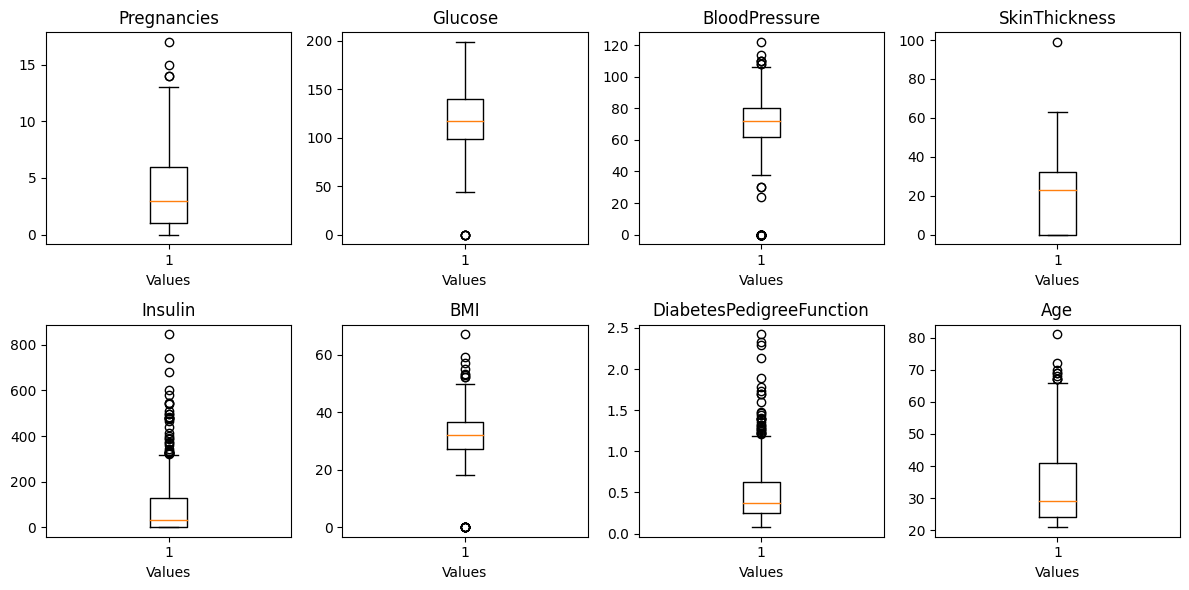

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

axs = axs.flatten()

for i, feature in enumerate(features_variables.columns):
    axs[i].boxplot(features_variables[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Values')

for j in range(len(features_variables.columns), len(axs)):
    fig.delaxes(axs[j])

fig.tight_layout()

plt.show()

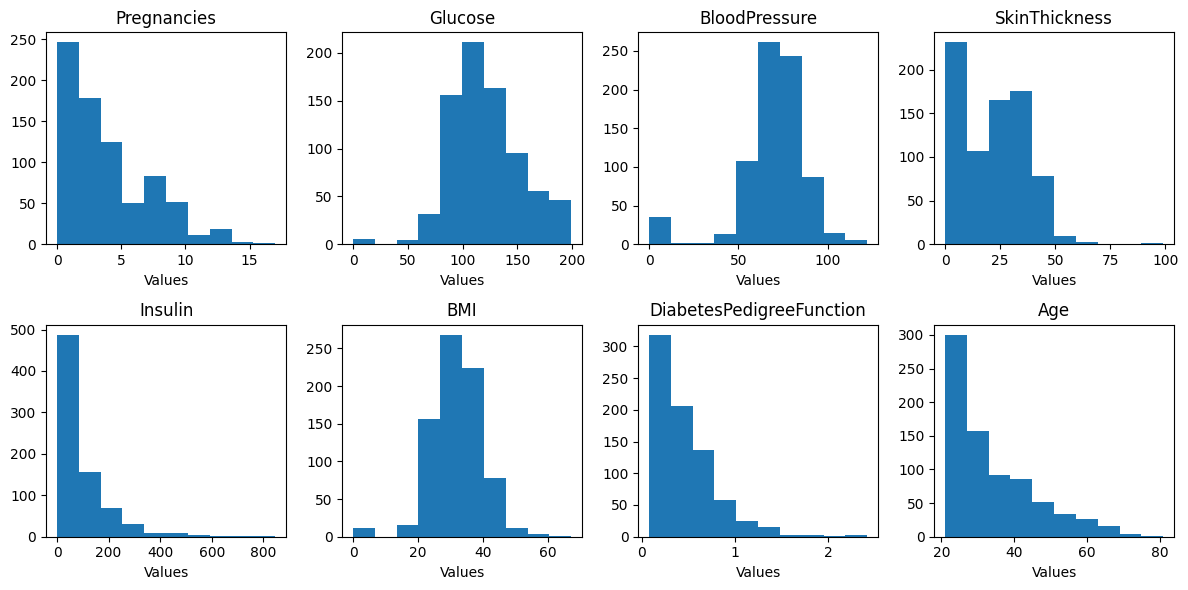

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

axs = axs.flatten()

for i, feature in enumerate(features_variables.columns):
    axs[i].hist(features_variables[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Values')

for j in range(len(features_variables.columns), len(axs)):
    fig.delaxes(axs[j])

fig.tight_layout()

plt.show()

In [13]:
alpha = 0.05
for column in features_variables.columns:
    column_data = features_variables[column]
    statistic, p_value = shapiro(column_data)

    print("Column:", column)
    print("Statistic:", statistic)
    print("p_value:", p_value)


    if (p_value < alpha):
        print("The data does not follow normal distribution")
    else:
        print("The data follows normal distribution")
    print()

Column: Pregnancies
Statistic: 0.9042831659317017
p_value: 1.6100101271064348e-21
The data does not follow normal distribution

Column: Glucose
Statistic: 0.9701048731803894
p_value: 1.987464880170986e-11
The data does not follow normal distribution

Column: BloodPressure
Statistic: 0.81892329454422
p_value: 1.5844936208677322e-28
The data does not follow normal distribution

Column: SkinThickness
Statistic: 0.904627799987793
p_value: 1.751799708531821e-21
The data does not follow normal distribution

Column: Insulin
Statistic: 0.7220208644866943
p_value: 7.915339984765649e-34
The data does not follow normal distribution

Column: BMI
Statistic: 0.9499890208244324
p_value: 1.8407586602041262e-15
The data does not follow normal distribution

Column: DiabetesPedigreeFunction
Statistic: 0.8365188837051392
p_value: 2.4777990069755762e-27
The data does not follow normal distribution

Column: Age
Statistic: 0.874765932559967
p_value: 2.401829612553989e-24
The data does not follow normal distr

<Axes: xlabel='Outcome', ylabel='count'>

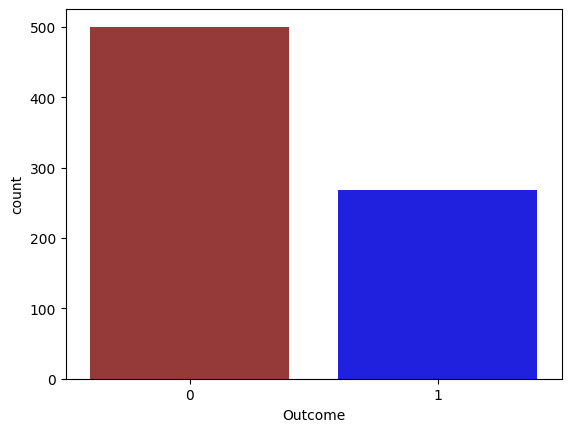

In [15]:
sns.countplot(x = outcome_variable, data = data, palette=['brown', 'blue'])

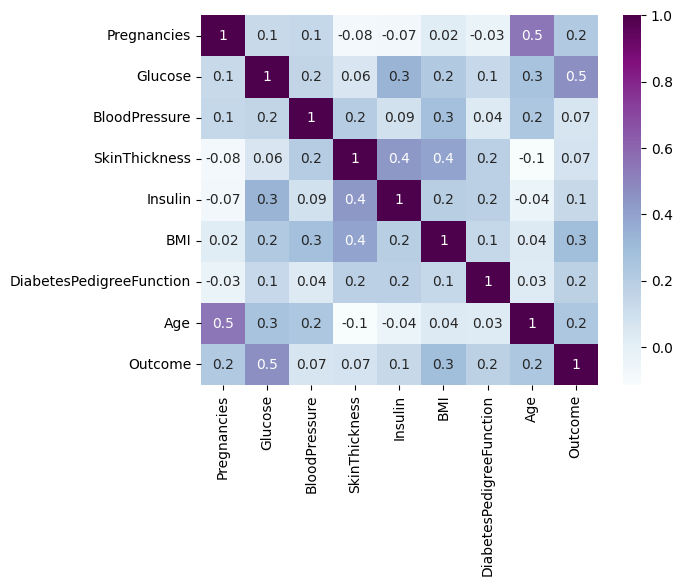

In [16]:
column_corr = data.corr()
heatmap = sns.heatmap(column_corr, annot=True, cmap="BuPu", fmt='.1g')

In [17]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [18]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.96

In [19]:
y_pred = pipe.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96


In [21]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[14,  1],
       [ 0, 10]])

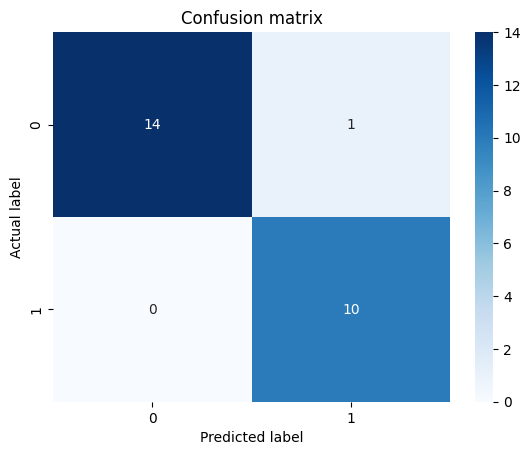

In [22]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cm, annot=True, cmap="Blues" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

In [23]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       1.00      0.93      0.97        15
   with diabetes       0.91      1.00      0.95        10

        accuracy                           0.96        25
       macro avg       0.95      0.97      0.96        25
    weighted avg       0.96      0.96      0.96        25

